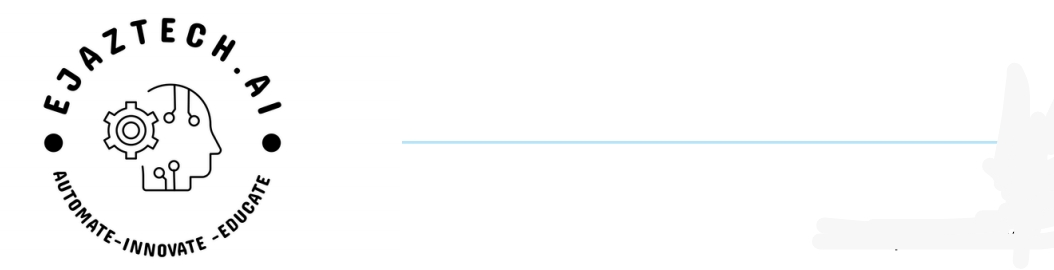

# EJAZTECH.AI FROM ZERO TO HERO PHASE 4 PROJECT SUBMISSION BY PATRICK DOMSHACK JAMES
PROJECT 3

In [1]:
# Installation
# !pip install pandas==2.1.4
# !pip install scikit-learn==1.6.0




In [2]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer


from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bankloan.csv')
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#basic data exploration
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
# # Handle missing values (if any)
# # df=df.dropna()

# df["Personal.Loan"].value_counts()


In [6]:
features = df.drop(["ID", "ZIP.Code", "Personal.Loan"], axis=1).columns.tolist()
X = df[features]
y = df["Personal.Loan"]


In [7]:
X

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [8]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal.Loan, Length: 5000, dtype: int64

## Model Training

In [9]:
# Split data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


X_train_original = X_train.copy()
X_test_original = X_test.copy()

# Polynomial features first
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# Crete Scaler for x
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Scaler_original
scaler_original=StandardScaler()
X_train_original = scaler_original.fit_transform(X_train_original)
X_test_original = scaler_original.transform(X_test_original)

# Create scaler for y
# scaler_y = StandardScaler()

# Fit on y_train and transform
# y_train= scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# # Transform y_test using the same scaler
# y_test= scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


In [10]:
print(np.unique(y_train))


[0 1]


In [11]:
logistic_model = LogisticRegression(max_iter= 20000)
logistic_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,20000
,multi_class,'deprecated'


In [12]:
# Make prediction
predicted=logistic_model.predict(X_test)
predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [13]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
predicted=tree_model.predict(X_test)
predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [14]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

predicted=random_forest_model.predict(X_test)
predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [15]:
xgb= XGBClassifier()
xgb.fit(X_train, y_train)

predicted=xgb.predict(X_test)
predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
neural_network_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # sigmoid for binary classification
])

# Compile the model
neural_network_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',    # correct loss
    metrics=['accuracy']           # good for classification
)

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
neural_network_model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Predict (probabilities)
y_pred_prob = neural_network_model.predict(X_test).flatten()

# Convert probabilities → 0 or 1
y_pred = (y_pred_prob >= 0.5).astype(int)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9281 - loss: 0.2171 - val_accuracy: 0.9575 - val_loss: 0.1128
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9672 - loss: 0.0932 - val_accuracy: 0.9638 - val_loss: 0.0891
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9750 - loss: 0.0693 - val_accuracy: 0.9613 - val_loss: 0.0844
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9816 - loss: 0.0574 - val_accuracy: 0.9625 - val_loss: 0.0811
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9812 - loss: 0.0520 - val_accuracy: 0.9675 - val_loss: 0.0862
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9841 - loss: 0.0494 - val_accuracy: 0.9675 - val_loss: 0.0717
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9850 - loss: 0.0447 - val_accuracy: 0.9688 - val_loss: 0.0679
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9887 - loss: 0.0415 - val_accu

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Logistic Regression predictions ---
logistic_pred = logistic_model.predict(X_test)

# --- Tree-based model predictions ---
tree_pred = tree_model.predict(X_test)
rf_pred = random_forest_model.predict(X_test)
xgb_pred = xgb.predict(X_test)

# --- Neural Network predictions (convert probabilities to 0/1) ---
nn_pred = (neural_network_model.predict(X_test).flatten() >= 0.5).astype(int)

# Dictionary to store results
results = {
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "F1-Score": {},
    "ROC-AUC": {}
}

models = {
    "Logistic Regression": logistic_pred,
    "Decision Tree": tree_pred,
    "Random Forest": rf_pred,
    "XGBoost": xgb_pred,
    "Neural Network": nn_pred
}

# Compute metrics for each model
for model_name, pred in models.items():
    results["Accuracy"][model_name] = accuracy_score(y_test, pred)
    results["Precision"][model_name] = precision_score(y_test, pred)
    results["Recall"][model_name] = recall_score(y_test, pred)
    results["F1-Score"][model_name] = f1_score(y_test, pred)
    results["ROC-AUC"][model_name] = roc_auc_score(y_test, pred)

results


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


{'Accuracy': {'Logistic Regression': 0.983,
  'Decision Tree': 0.983,
  'Random Forest': 0.992,
  'XGBoost': 0.992,
  'Neural Network': 0.98},
 'Precision': {'Logistic Regression': 0.9157894736842105,
  'Decision Tree': 0.9247311827956989,
  'Random Forest': 0.9583333333333334,
  'XGBoost': 0.9583333333333334,
  'Neural Network': 0.88},
 'Recall': {'Logistic Regression': 0.90625,
  'Decision Tree': 0.8958333333333334,
  'Random Forest': 0.9583333333333334,
  'XGBoost': 0.9583333333333334,
  'Neural Network': 0.9166666666666666},
 'F1-Score': {'Logistic Regression': 0.9109947643979057,
  'Decision Tree': 0.91005291005291,
  'Random Forest': 0.9583333333333334,
  'XGBoost': 0.9583333333333334,
  'Neural Network': 0.8979591836734694},
 'ROC-AUC': {'Logistic Regression': 0.948700221238938,
  'Decision Tree': 0.9440449852507375,
  'Random Forest': 0.9769542772861357,
  'XGBoost': 0.9769542772861357,
  'Neural Network': 0.9516961651917404}}

In [18]:
# Converting the results to a pandas DataFrame
results_df = pd.DataFrame(results)

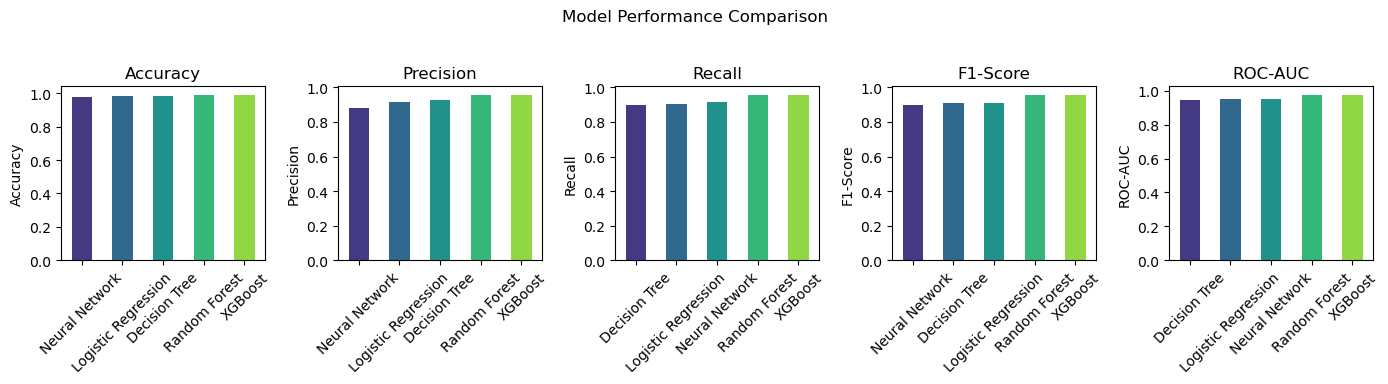

In [19]:
# perfomance comparison Plot
fig, axes = plt.subplots(nrows=1, ncols=len(results_df.columns), figsize=(14, 4))
fig.suptitle('Model Performance Comparison', fontsize=12)

for i, metric in enumerate(results_df.columns):
    ax = axes[i]
    results_df[metric].sort_values().plot(kind='bar', ax=ax, color=sns.color_palette('viridis', len(results_df)))
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [20]:
# # Find the best performing model based on R-squared
# best_model_r2 = results_df['R-squared'].idxmax()
# best_r2_score = results_df['R-squared'].max()

# print(f"The best performing model based on R-squared is: {best_model_r2} with an R-squared of {best_r2_score:.4f}")

best_model_f1 = results_df['F1-Score'].idxmax()
best_f1 = results_df['F1-Score'].max()

print(f"Best model based on F1 Score: {best_model_f1}  (F1 = {best_f1:.4f})")


Best model based on F1 Score: Random Forest  (F1 = 0.9583)


In [21]:
best_model_acc = results_df['Accuracy'].idxmax()
best_acc = results_df['Accuracy'].max()

print(f"Best model based on Accuracy: {best_model_acc}  (Accuracy = {best_acc:.4f})")


Best model based on Accuracy: Random Forest  (Accuracy = 0.9920)


**interpretation of the model performances**

* Mean Absolute Error (MAE): This metric measures the
average magnitude of errors in a set of predictions, without considering their direction. A lower MAE indicates a better model.
* Mean Squared Error (MSE): This metric measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. It's more sensitive to large errors than MAE. A lower MSE indicates a better model.
* R-squared: This metric represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared indicates that the model fits the data better.

**results performance:**

* The XGBoost model has the lowest MAE and MSE, and the highest R-squared value. This suggests that the XGBoost model is the best performing model among those you trained for this particular dataset and task.
* The Random Forest model also performed very well, with metrics close to those of XGBoost.
* The Linear Regression model had the highest MAE and MSE, and the lowest R-squared, indicating it was the least effective model in this case.
* The Neural Network performed better than Linear Regression but not as well as Random Forest or XGBoost.

In conclusion, the XGBoost model appears to be the most suitable model for predicting house prices.




***ADVANCED DATA VISUALISATION***

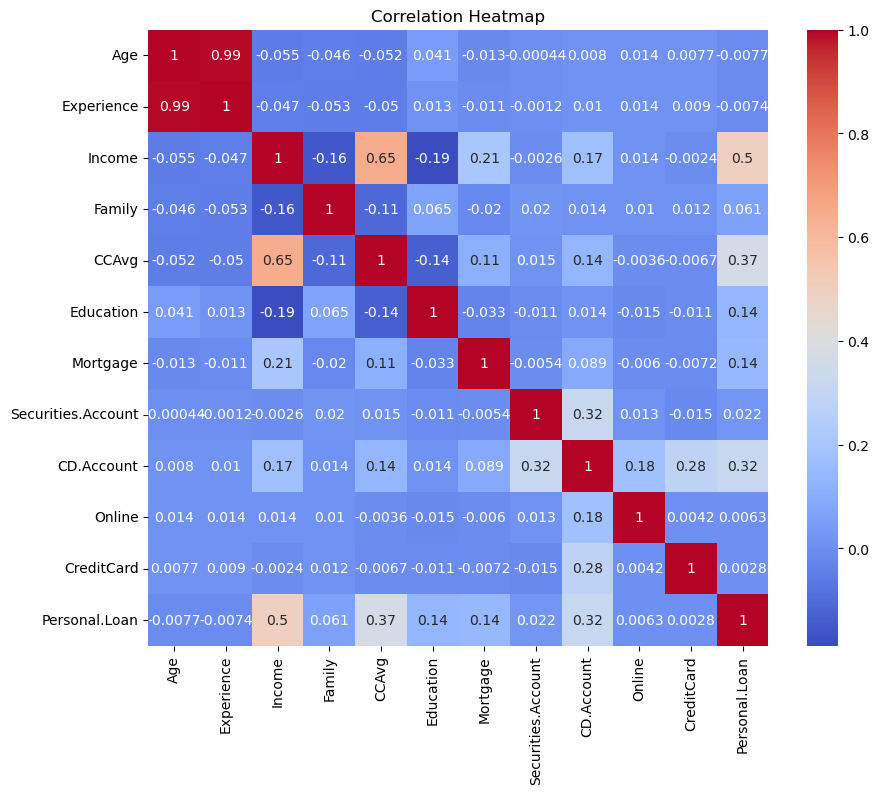

In [22]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[features + ['Personal.Loan']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

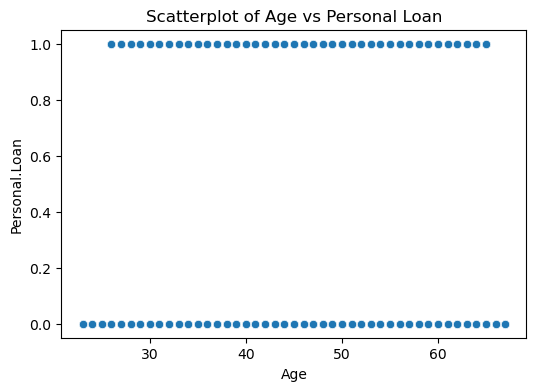

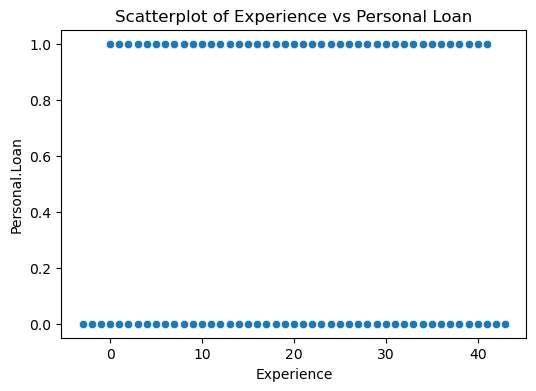

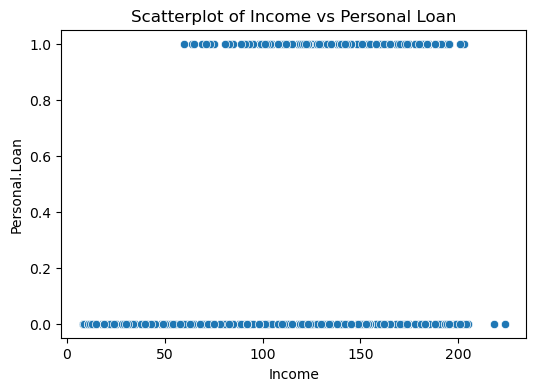

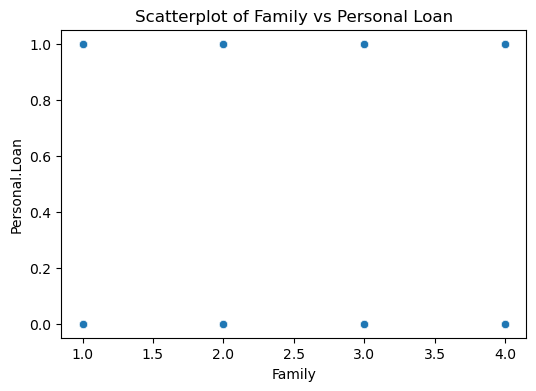

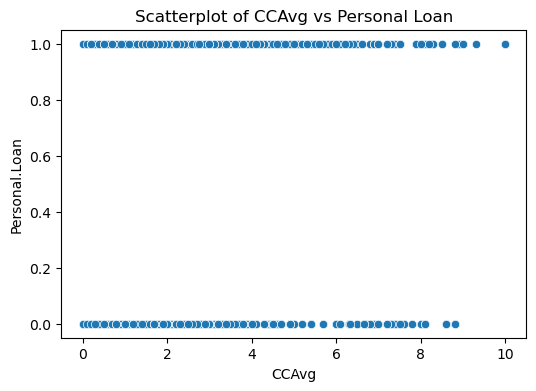

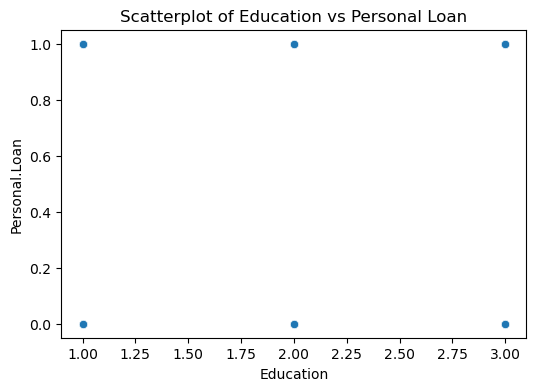

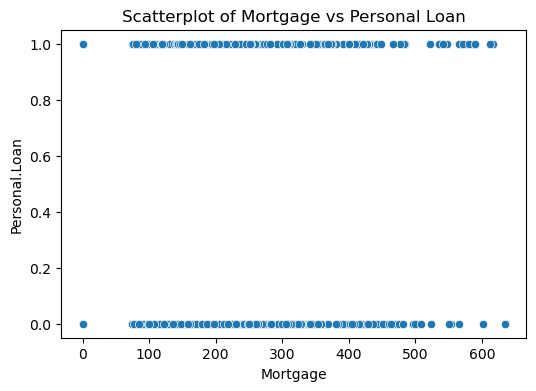

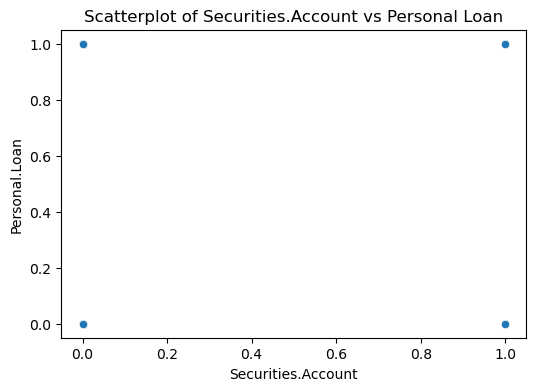

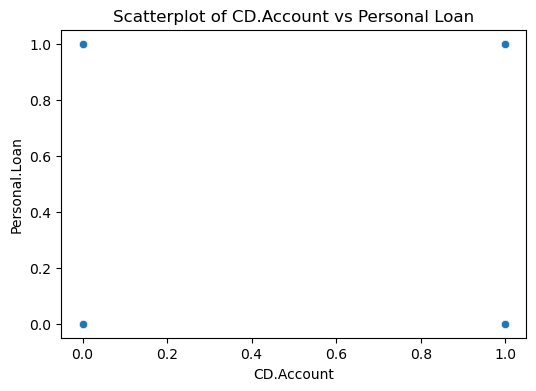

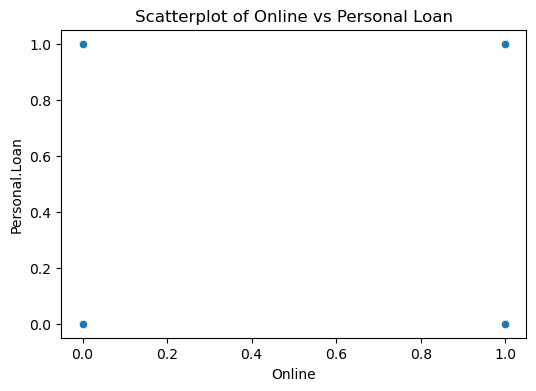

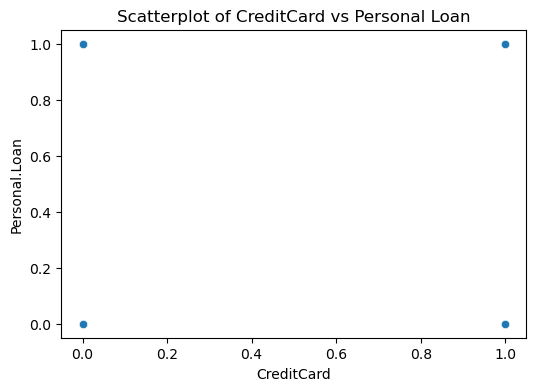

In [23]:
#scatterplot against price
for col in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['Personal.Loan'])
    plt.title(f'Scatterplot of {col} vs Personal Loan')
    #plt.xlabel(col)
    #plt.ylabel('Personal Loan')
    plt.show()


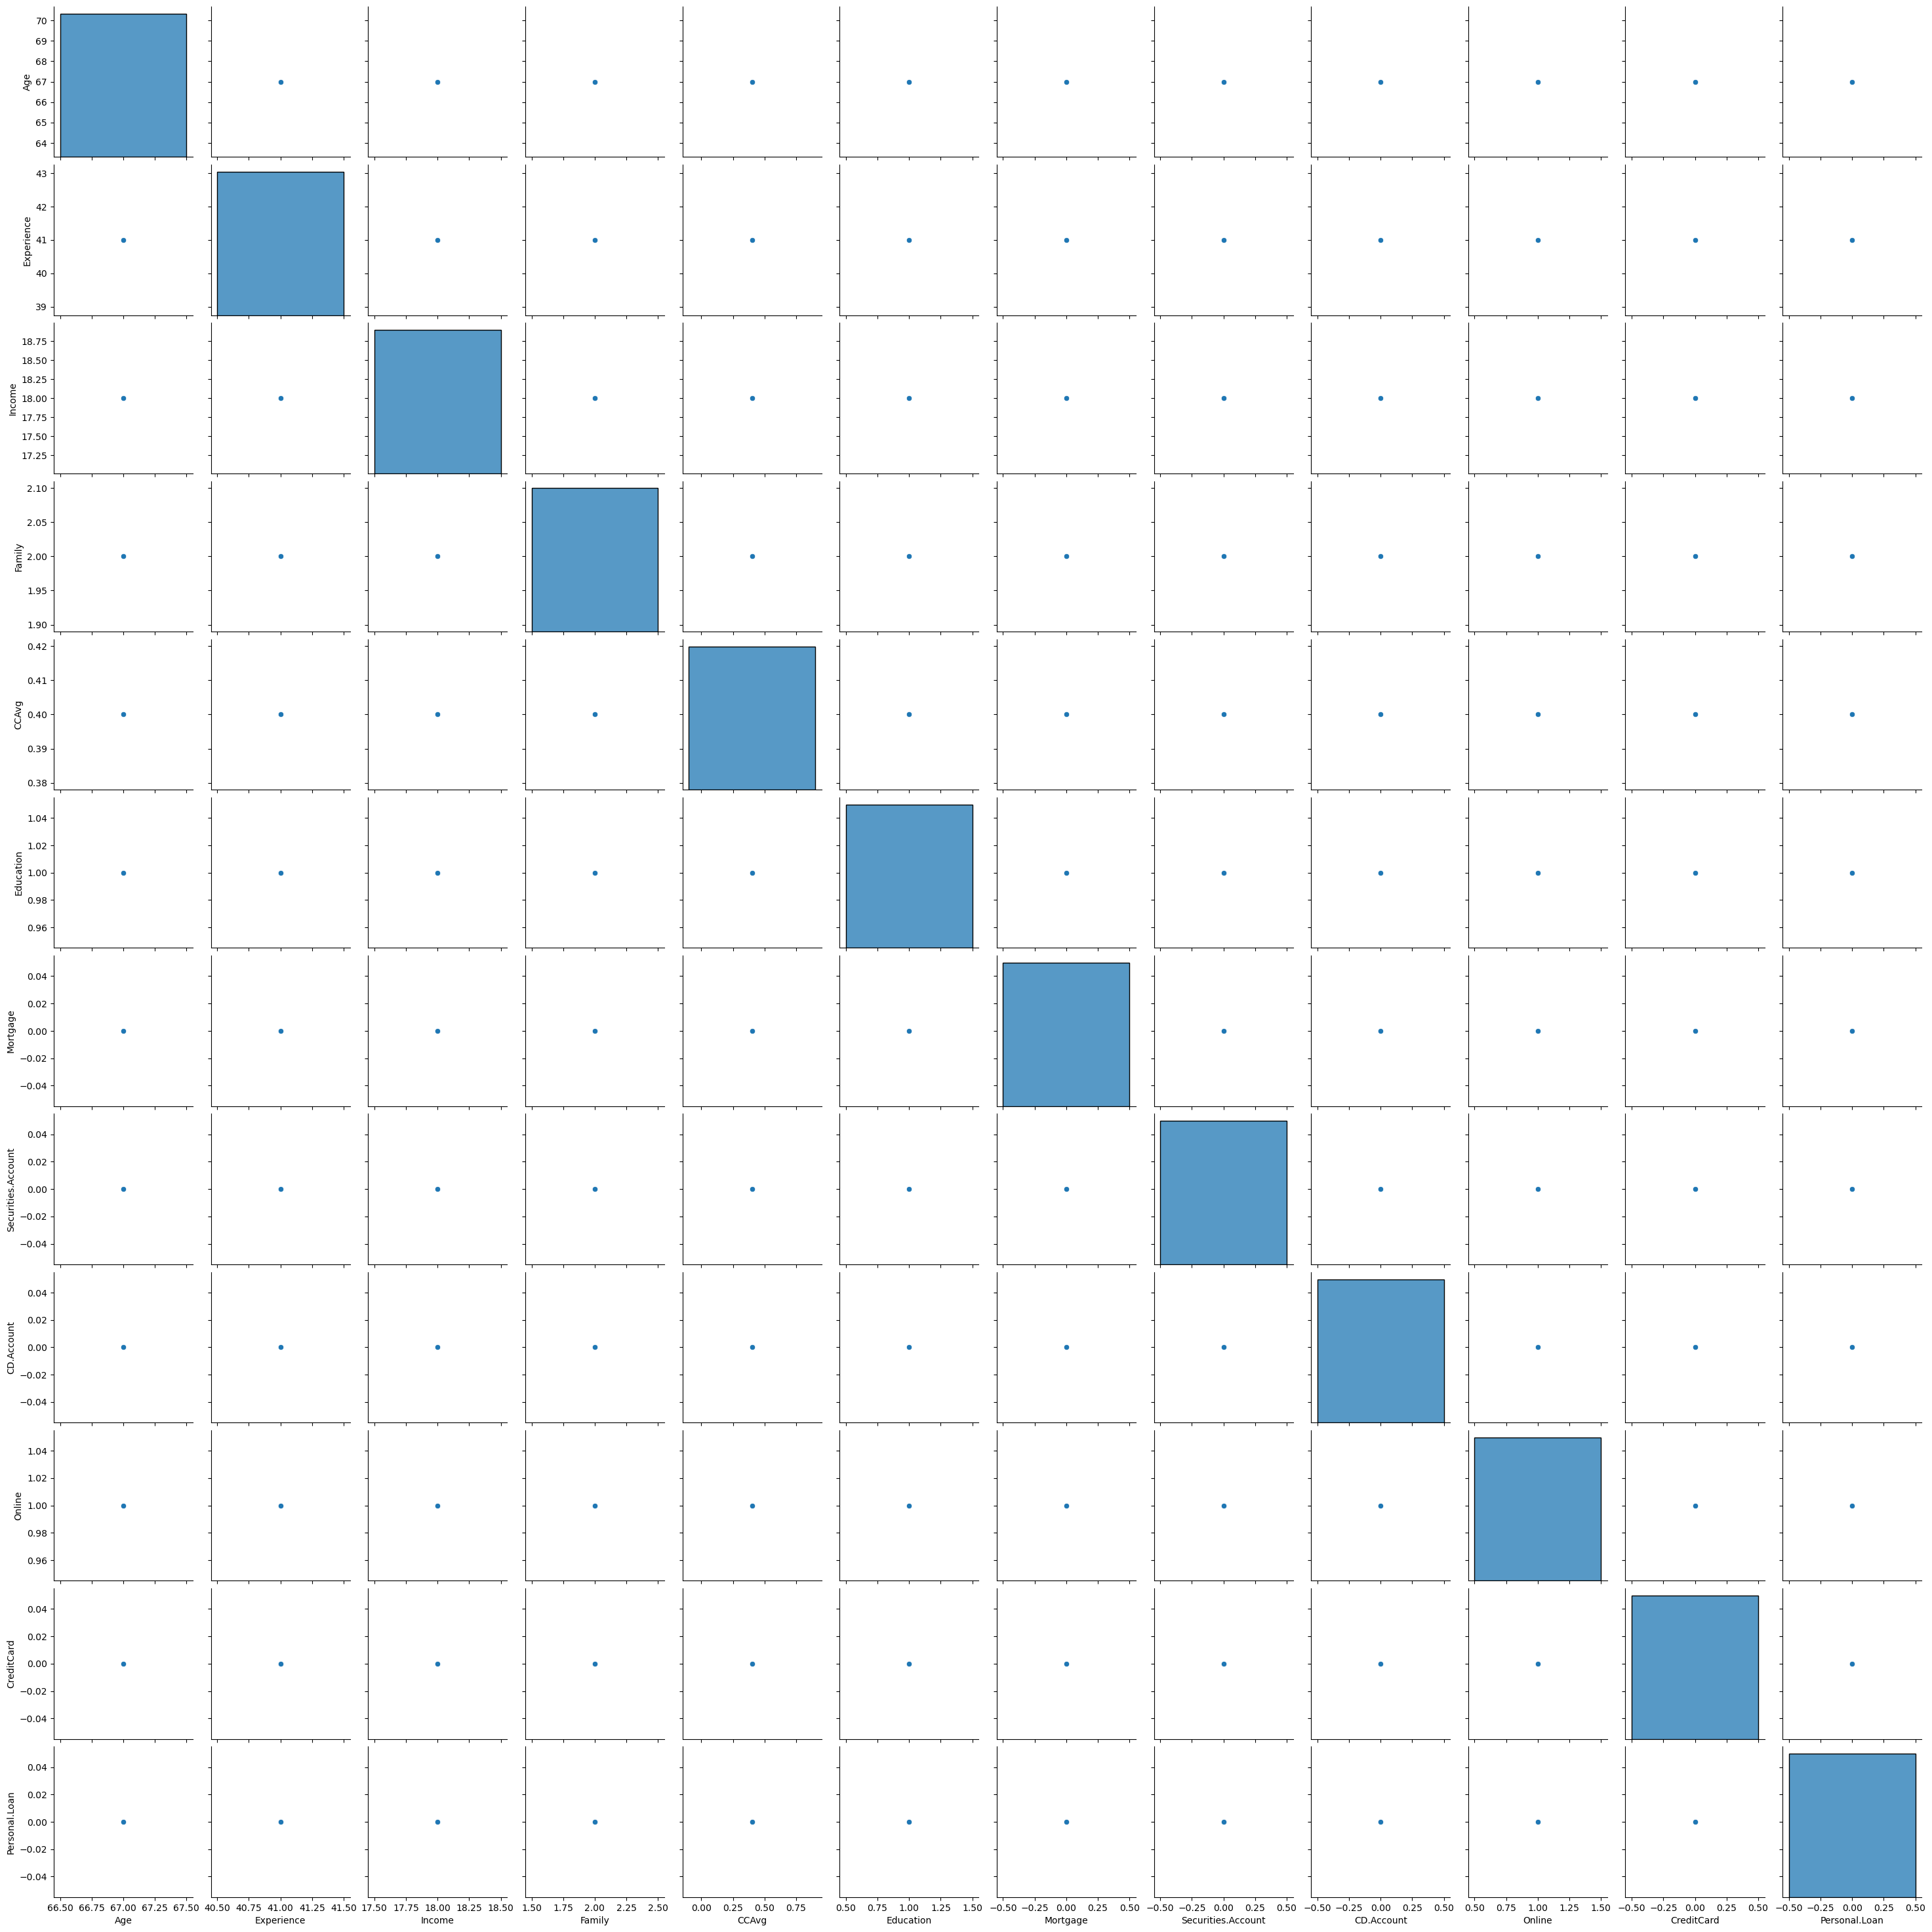

In [24]:
#PairPlot (Relationship Overview)
sample_df = df.sample()
sns.pairplot(sample_df[features+['Personal.Loan']])
plt.show()

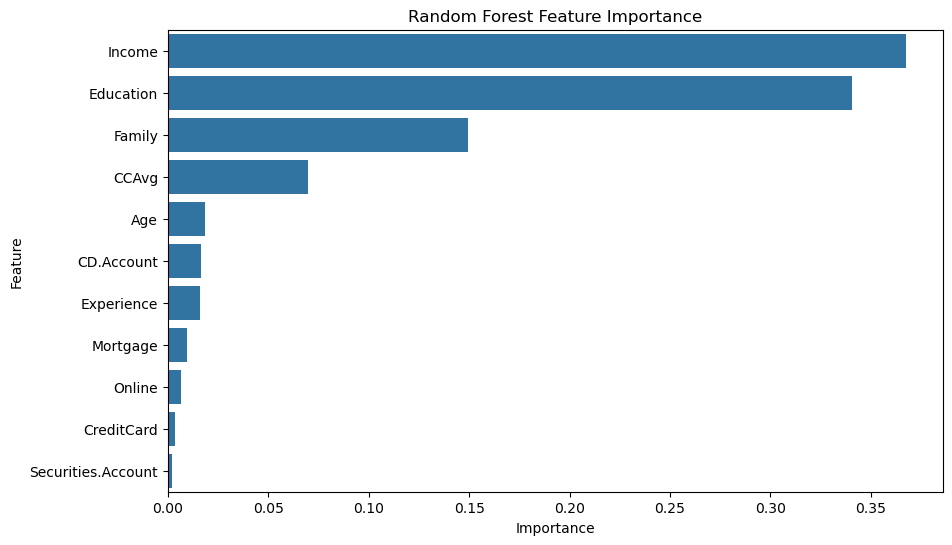

In [25]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_original, y_train)  # before polynomial transformation
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()


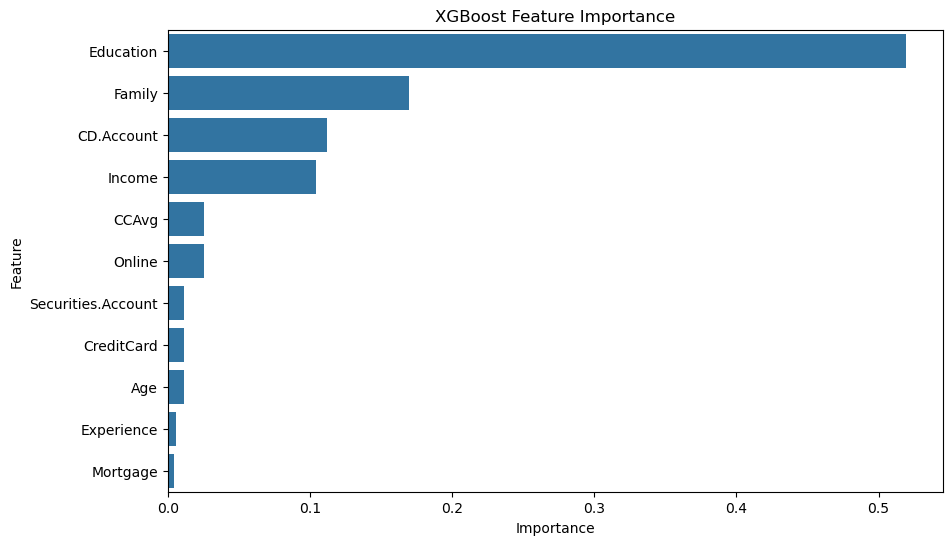

In [26]:
#feature importance using xgboost
xgb_model = XGBRegressor()
xgb_model.fit(X_train_original, y_train)
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('XGBoost Feature Importance')
plt.show()
